### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import glob
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import rotate_axes
from scipy.special import title
from setuptools.command.rotate import rotate

from src.code_files.build_data import load_data

### Data Load

In [5]:
df_list = []
directoryPath = "../../Data/ResultData/"

for file_name in glob.glob(directoryPath+'temperature/*.csv'):
    if file_name not in ["../../Data/ResultData/temperature/0_Global_air_actual_temperatures.csv", "../../Data/ResultData/temperature/0_Global_water_actual_temperatures.csv"]:
        # print(f"{file_name}: {df.shape}")
        df = pd.read_csv(file_name, low_memory=False)
        df_list.append(df)

df_air_global_temp = pd.read_csv(directoryPath+'temperature/0_Global_air_actual_temperatures.csv', low_memory=False)
df_water_global_temp = pd.read_csv(directoryPath+'temperature/0_Global_water_actual_temperatures.csv', low_memory=False)


In [6]:
df_temperature = pd.concat(df_list, ignore_index=True, axis=0)

In [7]:
df_temperature = df_temperature.merge(df_air_global_temp[['Year','Month','Actual Temperature']], 
                     how='left', 
                     on=['Year','Month'],
                     suffixes=('', '_Air_Global')).merge(df_water_global_temp[['Year','Month','Actual Temperature']], 
                     how='left', 
                     on=['Year','Month'],
                     suffixes=('', '_Water_Global'))

In [8]:
df_temperature.head()

,Year,Month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global
0,1819,7,22.664,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN
1,1819,8,NaN,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN
2,1819,9,20.356,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN
3,1819,10,13.372,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN
4,1819,11,6.752,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN


In [9]:
df_co2 = pd.read_csv(directoryPath+'co2.csv')
df_population = pd.read_csv(directoryPath+'population_modified.csv')
df_volcano = pd.read_csv(directoryPath+'volcano_yearly_VEI_stats.csv')

In [10]:
df_temperature[(df_temperature['City']=='7_London') & (df_temperature['Year']==1851)]

,Year,Month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global
15689,1851,1,4.837,7_London,Britain,52.24 N,0.00 W,12.071,12.730
15690,1851,2,3.894,7_London,Britain,52.24 N,0.00 W,12.035,12.823
15691,1851,3,5.569,7_London,Britain,52.24 N,0.00 W,12.520,13.283
15692,1851,4,7.289,7_London,Britain,52.24 N,0.00 W,13.370,14.084
15693,1851,5,10.347,7_London,Britain,52.24 N,0.00 W,14.620,15.125
15694,1851,6,14.804,7_London,Britain,52.24 N,0.00 W,15.399,15.806
15695,1851,7,15.350,7_London,Britain,52.24 N,0.00 W,15.744,16.175
15696,1851,8,16.373,7_London,Britain,52.24 N,0.00 W,15.492,16.037
15697,1851,9,12.876,7_London,Britain,52.24 N,0.00 W,14.808,15.392
15698,1851,10,10.473,7_London,Britain,52.24 N,0.00 W,14.134,14.662


### Data Preparation

In [11]:
df_temperature.rename(columns={'Year': 'year'}, inplace=True)
df_temperature.rename(columns={'Month': 'month'}, inplace=True)
df_co2.rename(columns={'monthly_average': 'monthly_average_co2'}, inplace=True)

In [12]:
df_volcano = df_volcano[df_volcano.year>=1750]
df_volcano = df_volcano.groupby(['year']).agg({'year_average_VEI':'first', 
                                                'year_events_amount':'first'}).reset_index()

In [13]:
df_merged_intermediate = pd.merge(df_temperature, df_co2, on=['year','month'], how='left')

In [14]:
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['year'],
                                            how='left'), [df_merged_intermediate, df_population, df_volcano])

In [15]:
df_merged.head()

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
0,1819,7,22.664,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN,NaN
1,1819,8,NaN,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN,NaN
2,1819,9,20.356,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN,NaN
3,1819,10,13.372,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN,NaN
4,1819,11,6.752,6_Tokyo,Japan,36.17 N,139.23 E,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged[(df_merged['City']=='13_SanDiego') & (df_merged['year']==1851)]

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
26911,1851,1,11.592,13_SanDiego,USA,32.95 N,117.77 W,12.071,12.730,NaN,NaN,NaN,NaN
26912,1851,2,10.790,13_SanDiego,USA,32.95 N,117.77 W,12.035,12.823,NaN,NaN,NaN,NaN
26913,1851,3,12.669,13_SanDiego,USA,32.95 N,117.77 W,12.520,13.283,NaN,NaN,NaN,NaN
26914,1851,4,14.941,13_SanDiego,USA,32.95 N,117.77 W,13.370,14.084,NaN,NaN,NaN,NaN
26915,1851,5,15.536,13_SanDiego,USA,32.95 N,117.77 W,14.620,15.125,NaN,NaN,NaN,NaN
26916,1851,6,18.044,13_SanDiego,USA,32.95 N,117.77 W,15.399,15.806,NaN,NaN,NaN,NaN
26917,1851,7,18.779,13_SanDiego,USA,32.95 N,117.77 W,15.744,16.175,NaN,NaN,NaN,NaN
26918,1851,8,20.605,13_SanDiego,USA,32.95 N,117.77 W,15.492,16.037,NaN,NaN,NaN,NaN
26919,1851,9,19.695,13_SanDiego,USA,32.95 N,117.77 W,14.808,15.392,NaN,NaN,NaN,NaN
26920,1851,10,18.015,13_SanDiego,USA,32.95 N,117.77 W,14.134,14.662,NaN,NaN,NaN,NaN


In [17]:
df_merged.groupby(['City']).agg({'Latitude':'first', 'Longitude':'first'}).reset_index()

,City,Latitude,Longitude
0,10_Pretoria,24.92 S,28.37 E
1,11_Marrakesh,31.35 N,7.54 W
2,12_Anchorage,61.88 N,151.13 W
3,13_SanDiego,32.95 N,117.77 W
4,14_NewYork,40.99 N,74.56 W
5,15_Paris,49.03 N,2.45 E
6,16_Rome,42.59 N,13.09 E
7,17_Barcelona,40.99 N,2.13 E
8,18_Helsinki,60.27 N,25.95 E
9,19_Sydney,34.56 S,151.78 E


### Plots

#### Global Temp over the years

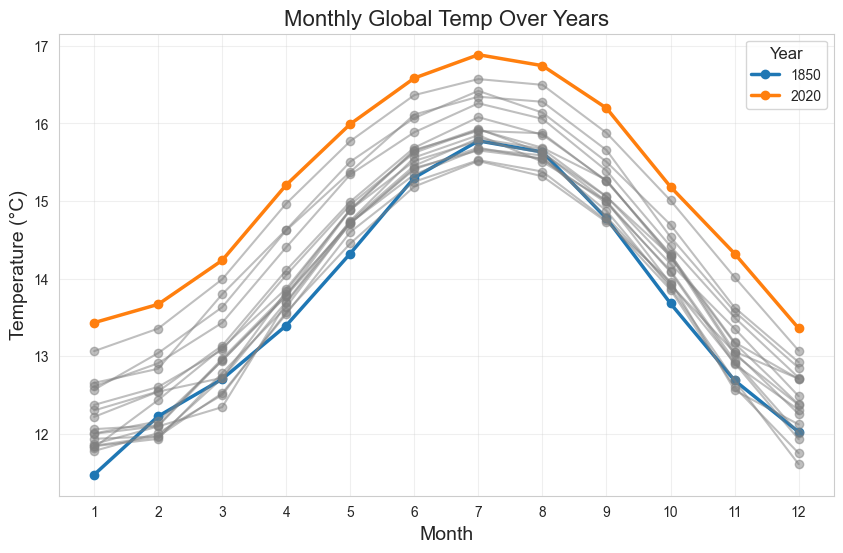

In [100]:
# Pivot table to structure data for plotting
df_air_global_temp_sub = df_air_global_temp[df_air_global_temp['Year'].isin(list(range(1830, 2021, 10)))].reset_index(drop=True)
pivot_df = df_air_global_temp_sub.pivot(index='Month', columns='Year', values='Actual Temperature')

# Plotting
plt.figure(figsize=(10, 6))

# Loop through the years and customize colors
for year in pivot_df.columns:
    if year in [1850, 2020]:
        plt.plot(
            pivot_df.index, pivot_df[year], marker='o',
            label=str(year), linewidth=2.5
        )
    else:
        plt.plot(
            pivot_df.index, pivot_df[year], marker='o',
            color='grey', alpha=0.5, label=None  # No label for other years
        )

# Customizing the plot
plt.title('Monthly Global Temp Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(pivot_df.index)  # Ensure x-axis shows months
plt.legend(title='Year', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
# plt.savefig('../eda_results/global_temp_monthly.png')
plt.show()

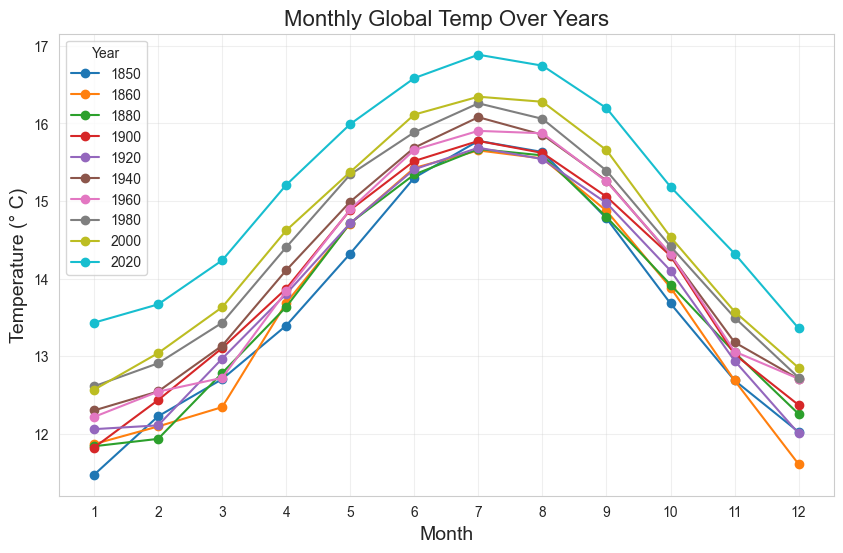

In [106]:
# Pivot table to structure data for plotting
df_air_global_temp_sub = df_air_global_temp[df_air_global_temp['Year'].isin([1850] + list(range(1840,2021,20)))].reset_index(drop=True)
pivot_df = df_air_global_temp_sub.pivot(index='Month', columns='Year', values='Actual Temperature')

# Plotting
plt.figure(figsize=(10, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

# Customizing the plot
plt.title('Monthly Global Temp Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (° C)', fontsize=14)
plt.xticks(pivot_df.index)  # Ensure x-axis shows months
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.savefig('../eda_results/global_temp_monthly.png')

In [19]:
df_air_global_temp['Timeline'] = df_air_global_temp.apply(lambda row: str(row['Year']) + "-" + str(row['Month']), axis=1)

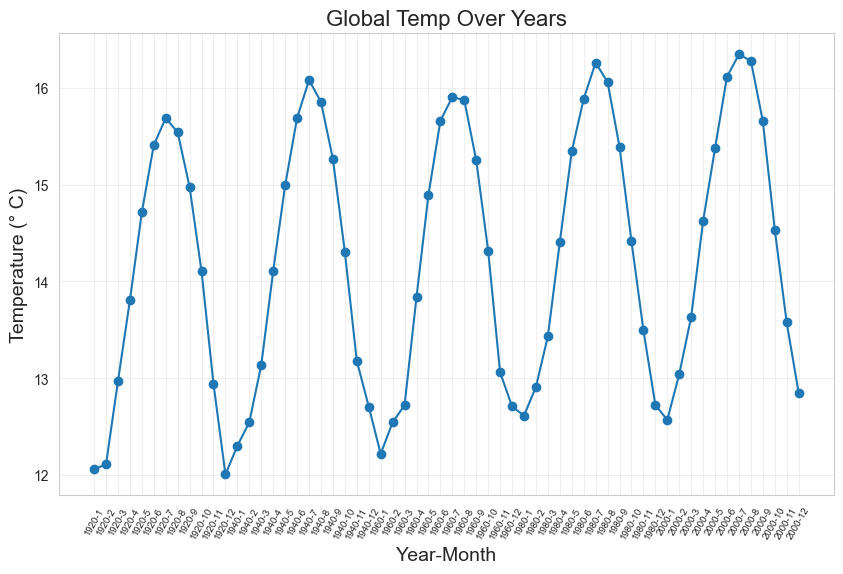

In [20]:
plt.figure(figsize=(10, 6))
df_air_global_temp_sub = df_air_global_temp[df_air_global_temp["Year"].isin(list(range(1920,2020,20)))].reset_index(drop=True)
plt.plot(df_air_global_temp_sub['Timeline'], df_air_global_temp_sub['Actual Temperature'],
         marker='o', label=str('Actual Temperature'))
# Customizing the plot
plt.title('Global Temp Over Years', fontsize=16)
plt.xlabel('Year-Month', fontsize=14,)
plt.ylabel('Temperature (° C)', fontsize=14)
plt.xticks(df_air_global_temp_sub.index, rotation=60, fontsize=7)  
# plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.savefig('../eda_results/global_temp_yearly.png')

    ### Location on map

In [21]:
df_location = df_merged.groupby(['City']).agg({'Latitude':'first', 'Longitude':'first'}).reset_index()

city = []
location = []
for row in df_location.itertuples():
    city.append(row[1])
    if row[3][-1] == 'W':
        if row[2][-1] == 'S': 
            location.append((-float(row[2].split(" ")[0]), -float(row[3].split(" ")[0])))
        else:
            location.append((float(row[2].split(" ")[0]), -float(row[3].split(" ")[0])))
    else:
        if row[2][-1] == 'S': 
            location.append((-float(row[2].split(" ")[0]), float(row[3].split(" ")[0])))
        else:
            location.append((float(row[2].split(" ")[0]), float(row[3].split(" ")[0])))


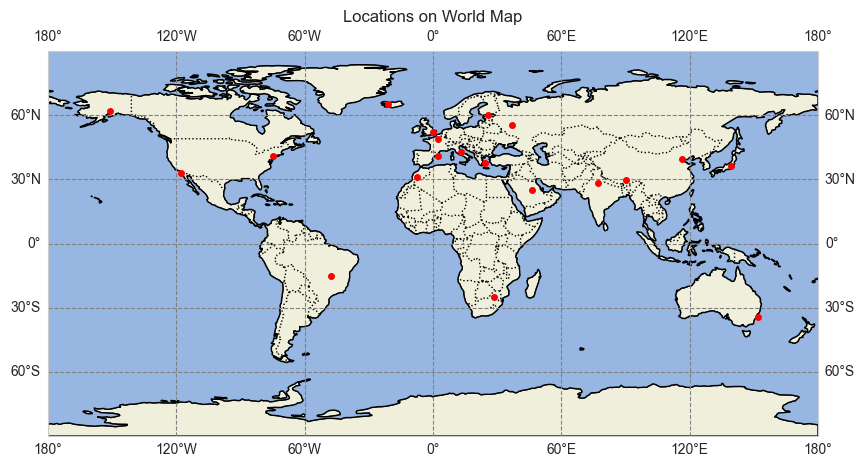

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Create a figure and add a map projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add features like coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Add gridlines for better visualization
ax.gridlines(draw_labels=True, linestyle="--", color="gray")

# Plot each location on the map
for lat, lon in location:
    ax.plot(lon, lat, 'ro', markersize=4)  # Red dots for each location

# Optional: Label each location
# for i,(lat, lon) in enumerate(location):
#     ax.text(lon, lat+3, f"({i})", fontsize=10, color='black')  # Adjust text offset as needed

# Set the extent (optional, focus on a specific region or use global)
ax.set_global()

# Show the map
plt.title("Locations on World Map")
# plt.show()
plt.savefig('../eda_results/world_map.png')

### Monthly Temperature of Cities over the years

In [23]:
# for i,c in enumerate(city):
#     df_merged_sub = df_merged[df_merged['year'].isin(list(range(1850,2020,20)))].reset_index(drop=True)
#     pivot_df = df_merged_sub[df_merged_sub['City']==c].pivot(index='month', columns='year', values='Actual Temperature')
#     # Pivot table to structure data for plotting
# 
#     # Plotting
#     plt.figure(figsize=(10, 6))
#     my_colors = plt.rcParams['axes.prop_cycle']() 
# 
#     for year in pivot_df.columns:
#         plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year), **next(my_colors))
# 
#     # Customizing the plot
#     plt.title(f'Monthly temperature Over Years for {c.split("_")[-1]}', fontsize=16)
#     plt.xlabel('Months', fontsize=14)
#     plt.ylabel('Temperature (° C)', fontsize=14)
#     plt.xticks(pivot_df.index)  # Ensure x-axis shows months
#     plt.legend(title='Year',fontsize=7.5)
#     plt.grid(alpha=0.3)
#     plt.savefig(f'../eda_results/temperature_over_years_for_{c.split("_")[-1]}.png')
#     # break 

### Growth Rate

### Missing Data

In [24]:
df_missing_data = df_merged.groupby(['year']).agg({'Actual Temperature':'count'}).reset_index()
df_missing_data.rename(columns={'Actual Temperature':'non_null_values'}, inplace=True)
df_missing_data['%_non_null_values'] = df_missing_data['non_null_values']/240 *100 # 20 countries and each having 12 data points

In [25]:
df_missing_data['%_non_null_values'].value_counts(ascending=False)

%_non_null_values
100.000000    145
50.000000      16
55.000000      12
45.000000      11
95.000000      11
54.166667       4
38.333333       4
44.166667       4
90.000000       3
70.000000       3
60.000000       3
80.000000       3
44.583333       3
39.583333       3
40.000000       2
30.000000       2
89.583333       2
68.750000       2
76.250000       2
20.000000       2
64.166667       2
75.000000       2
54.583333       2
74.583333       2
99.583333       2
99.166667       2
73.333333       1
77.083333       1
70.416667       1
96.666667       1
83.750000       1
85.000000       1
98.333333       1
88.333333       1
77.500000       1
90.833333       1
25.416667       1
65.000000       1
79.583333       1
51.666667       1
16.666667       1
34.583333       1
38.750000       1
39.166667       1
42.500000       1
41.250000       1
59.166667       1
68.333333       1
69.583333       1
63.333333       1
64.583333       1
61.250000       1
62.083333       1
72.916667       1
98.750000 

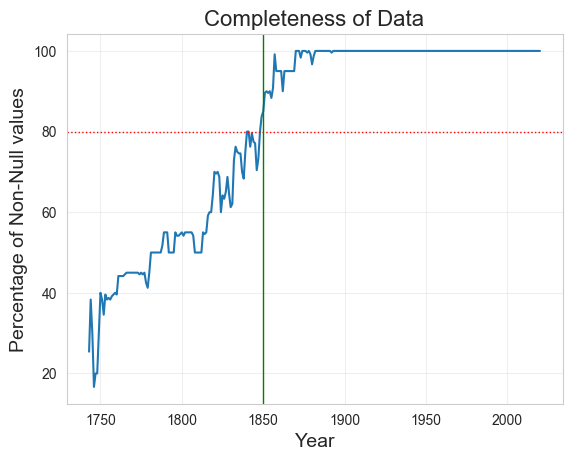

In [26]:
plt.plot(df_missing_data['year'], df_missing_data['%_non_null_values'], markersize=4,)
plt.title(f'Completeness of Data', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Non-Null values', fontsize=14)
# plt.xticks(df_missing_data.year, fontsize = 1, rotation=60)  # Ensure x-axis shows months
# plt.legend(title='Year',fontsize=7.5)
plt.grid(alpha=0.3)
plt.axhline(y = 80, color = 'r', linestyle = ':', linewidth = 1) 
plt.axvline(x = 1850, color = 'g', linestyle = '-', linewidth = 1)
plt.savefig(f'../eda_results/completeness_of_data.png')


### Correlation Plots

In [27]:
df_merged_sub = df_merged[df_merged['year']>=1850].reset_index(drop=True) 
df_merged_sub["Latitude"] = df_merged['Latitude'].apply(lambda row: float(row.split(" ")[0]) if row.split(" ")[1]=="N" else  -float(row.split(" ")[0]))
df_merged_sub["Longitude"] = df_merged['Longitude'].apply(lambda row: float(row.split(" ")[0]) if row.split(" ")[1]=="E" else  -float(row.split(" ")[0]))

In [28]:
# sns.pairplot(df_merged_sub[['Actual Temperature','Latitude','Longitude','Actual Temperature_Air_Global',
#                'monthly_average_co2','population','year_average_VEI','year_events_amount']])
# plt.show()

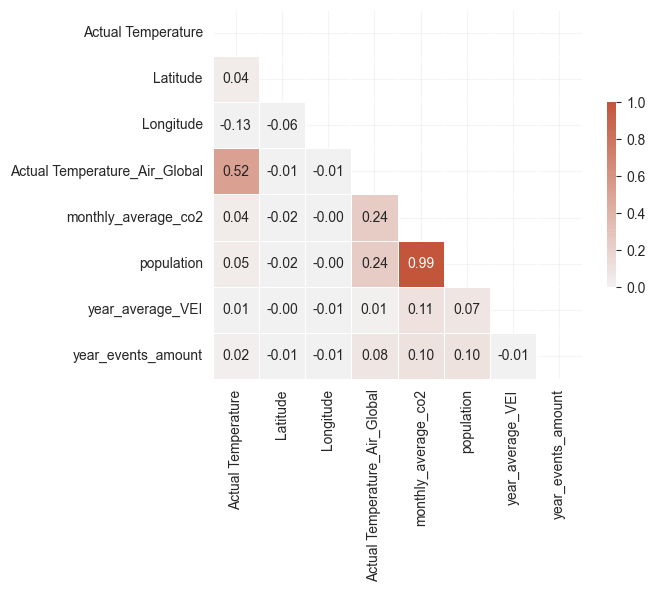

In [95]:
corr = df_merged_sub[['Actual Temperature','Latitude','Longitude','Actual Temperature_Air_Global',
               'monthly_average_co2','population','year_average_VEI','year_events_amount']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.grid(alpha=0.2)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, 
            xticklabels=True, yticklabels=True, annot=True, fmt = '0.2f',)
plt.savefig('../eda_results/correlation.png', bbox_inches='tight')

In [35]:
df_merged_sub['shift'] = df_merged_sub.groupby(["Country"])['Actual Temperature'].shift()

In [37]:
df_merged_sub["change_in_temp"] = df_merged_sub['Actual Temperature'] - df_merged_sub['shift']

In [38]:
df_merged_sub

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount,shift,change_in_temp
0,1850,1,-0.288,6_Tokyo,Japan,36.17,139.23,11.474,12.214,NaN,NaN,2.0,1.0,NaN,NaN
1,1850,2,0.783,6_Tokyo,Japan,36.17,139.23,12.227,12.993,NaN,NaN,2.0,1.0,-0.288,1.071
2,1850,3,5.673,6_Tokyo,Japan,36.17,139.23,12.706,13.444,NaN,NaN,2.0,1.0,0.783,4.890
3,1850,4,9.840,6_Tokyo,Japan,36.17,139.23,13.396,14.119,NaN,NaN,2.0,1.0,5.673,4.167
4,1850,5,15.825,6_Tokyo,Japan,36.17,139.23,14.324,14.887,NaN,NaN,2.0,1.0,9.840,5.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40951,2020,8,21.024,15_Paris,France,-15.27,-47.50,16.744,17.191,412.75,7.821272e+09,4.0,1.0,19.491,1.533
40952,2020,9,17.606,15_Paris,France,-15.27,-47.50,16.197,16.606,411.50,7.821272e+09,4.0,1.0,21.024,-3.418
40953,2020,10,11.528,15_Paris,France,-15.27,-47.50,15.183,15.582,411.48,7.821272e+09,4.0,1.0,17.606,-6.078
40954,2020,11,9.025,15_Paris,France,-15.27,-47.50,14.323,14.716,413.10,7.821272e+09,4.0,1.0,11.528,-2.503


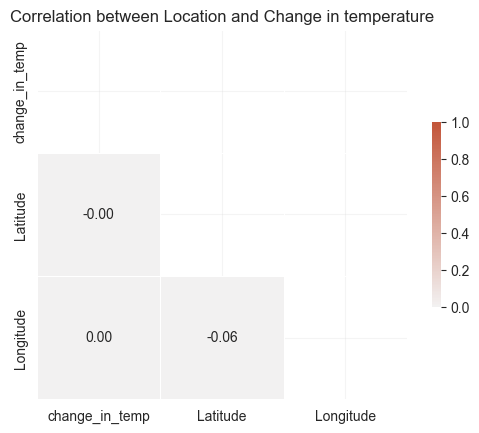

In [93]:
corr = df_merged_sub[['change_in_temp','Latitude','Longitude']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.grid(alpha=0.2)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, 
            xticklabels=True, yticklabels=True, annot=True, fmt = '0.2f')

plt.title("Correlation between Location and Change in temperature")
plt.savefig('../eda_results/correlation_location_and_temp_change.png')


### Dynamic Plot for Temperature

In [44]:
df_merged_sub["City"].unique()

array(['6_Tokyo', '1_Peking', '11_Marrakesh', '18_Helsinki', '14_NewYork',
       '7_London', '4_Moscow', '9_Lhasa', '16_Rome', '13_SanDiego',
       '12_Anchorage', '10_Pretoria', '3_Riyadh', '17_Barcelona',
       '20_Brasília', '19_Sydney', '8_Reykjavík', '2_NewDelhi',
       '5_Athens', '15_Paris'], dtype=object)

In [64]:
df_sd = df_merged_sub[df_merged_sub["City"]=='13_SanDiego'].reset_index(drop=True)
a = df_sd["Latitude"].values[0]

In [66]:
float(a)

55.45

In [69]:
df_sd["Actual Temperature"].values

array([11.408, 11.573, 12.3  , ..., 21.521, 17.21 , 15.282])

In [84]:
cities = []
for city in df_merged_sub["City"].unique():
    
    n = city.split("_")[-1]
    df_city = df_merged_sub[df_merged_sub["City"]==city].reset_index(drop=True)
    lat = float(df_city["Latitude"].values[0])
    long = float(df_city["Longitude"].values[0])
    temp = df_city["Actual Temperature"].values
    
    cities.append({"name": n, "lat": lat, "lon": long, "temp": temp})

In [85]:
cities = cities[:5]

In [86]:
cities

[{'name': 'Tokyo',
  'lat': 36.17,
  'lon': 139.23,
  'temp': array([-0.288,  0.783,  5.673, ..., 14.491, 10.471,  3.947])},
 {'name': 'Peking',
  'lat': 36.17,
  'lon': 139.23,
  'temp': array([-5.689, -2.047,  5.535, ..., 12.98 ,  6.099, -2.769])},
 {'name': 'Marrakesh',
  'lat': 39.38,
  'lon': 116.53,
  'temp': array([ 7.097, 11.059, 13.585, ..., 19.39 , 15.208, 10.802])},
 {'name': 'Helsinki',
  'lat': 31.35,
  'lon': -7.54,
  'temp': array([-13.962,  -6.468,  -7.025, ...,   8.831,   5.569,   1.528])},
 {'name': 'NewYork',
  'lat': 60.27,
  'lon': 25.95,
  'temp': array([-1.267, -0.234,  1.675, ..., 12.403,  8.153,  1.209])}]

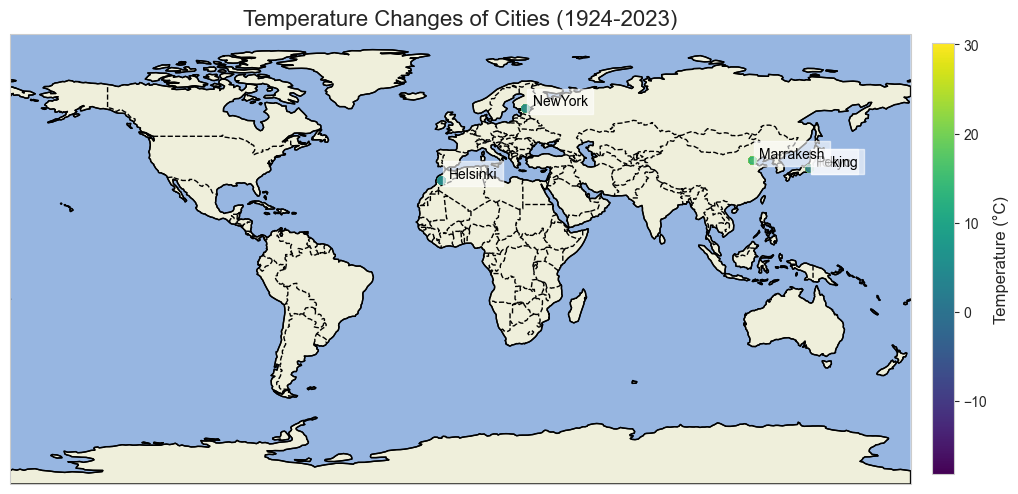

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Normalize all temperature data for a unified color scale
all_temps = np.concatenate([city["temp"] for city in cities])
min_temp, max_temp = np.min(all_temps), np.max(all_temps)

# Set up the map with global extent
fig, ax = plt.subplots(
    figsize=(14, 8),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

# Set global extent for the entire world
ax.set_global()

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=1)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.BORDERS, linestyle='--', zorder=2)
ax.add_feature(cfeature.COASTLINE, zorder=2)

# Plot each city
for city in cities:
    normalized_temp = (city["temp"] - min_temp) / (max_temp - min_temp)
    for year, temp_norm in enumerate(normalized_temp):
        ax.plot(
            city["lon"],
            city["lat"],
            marker='o',
            color=plt.cm.viridis(temp_norm),
            transform=ccrs.PlateCarree(),
            markersize=5,
            alpha=0.5
        )
    # Annotate city names
    ax.text(
        city["lon"] + 3, city["lat"] + 1, city["name"],
        transform=ccrs.PlateCarree(),
        fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.6)
    )

# Add title and color bar
ax.set_title("Temperature Changes of Cities (1924-2023)", fontsize=16)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min_temp, vmax=max_temp))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Temperature (°C)', fontsize=12)

# Show the map
plt.show()


### Population, Co2, Volcano trends

In [309]:
df_co2_per_person = df_co2.groupby('year').agg({"monthly_average_co2":"mean"}).reset_index().merge(df_population, on='year', how='right')
df_co2_per_person['co2_pp'] = df_co2_per_person['monthly_average_co2']/df_co2_per_person['population']

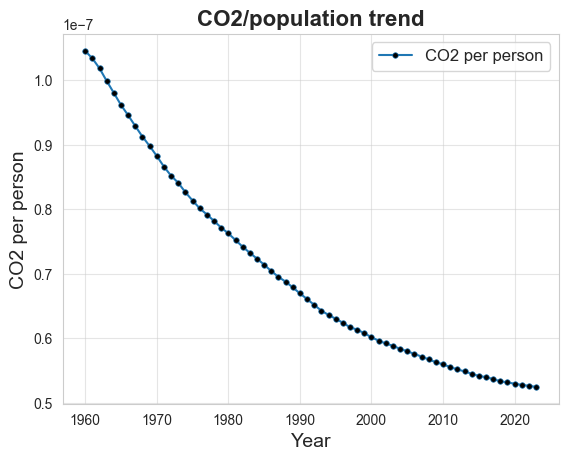

In [457]:
# plt.figure(figsize=(10, 6))
# plt.subplot(1,3,1)
plt.plot(df_co2_per_person['year'], df_co2_per_person['co2_pp'], marker='o', markersize = 4,
         markerfacecolor='black', markeredgewidth=0.5, label = 'CO2 per person')
plt.title(f'CO2/population trend', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 per person', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.5)

plt.savefig(f'../eda_results/co2_pp.png')

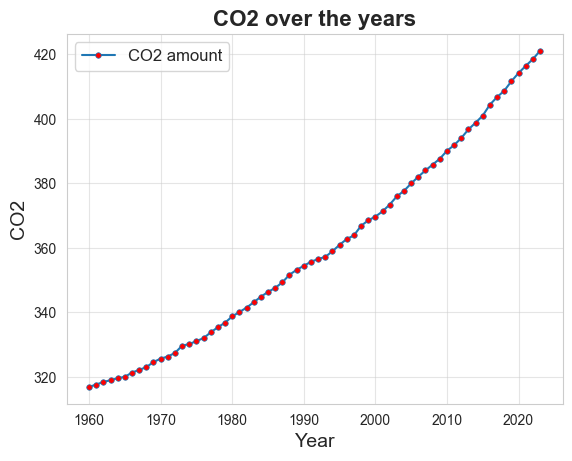

In [456]:
plt.plot(df_co2_per_person['year'], df_co2_per_person['monthly_average_co2'], marker='o', markersize = 4,
         markerfacecolor='red', markeredgewidth=0.5, label='CO2 amount')
plt.title(f'CO2 over the years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.5)

plt.savefig(f'../eda_results/co2_trend.png')

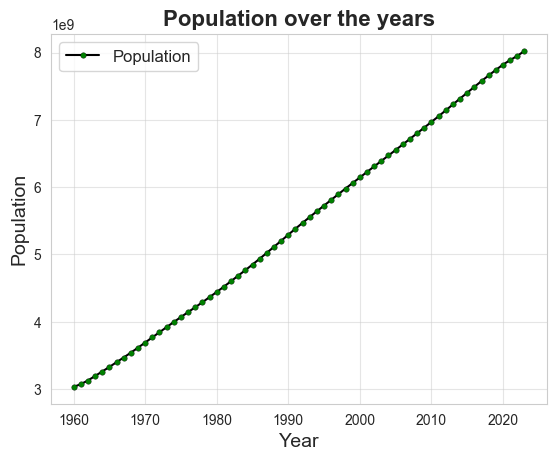

In [455]:
plt.plot(df_co2_per_person['year'], df_co2_per_person['population'], 
         marker='o', markersize = 4, color = 'black',
         markerfacecolor='green', markeredgewidth=0.25, label='Population')
plt.title(f'Population over the years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.5)

plt.savefig(f'../eda_results/population_trend.png')

In [500]:
window_size = 5
df_volcano['rolling_year_average_VEI'] = df_volcano['year_average_VEI'].rolling(window=window_size, min_periods=1).mean()  # Rolling mean
df_volcano['rolling_year_events_amount'] = df_volcano['year_events_amount'].rolling(window=window_size, min_periods=1).mean()

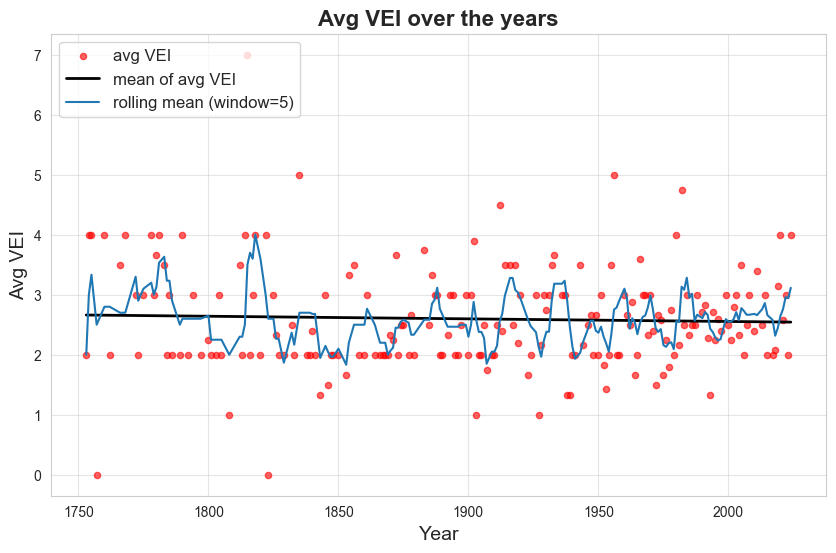

In [496]:
plt.figure(figsize=(10,6))
sns.regplot(x = df_volcano['year'], y=df_volcano['year_average_VEI'], 
            x_ci='ci', ci=None, 
            color='black', scatter_kws={'alpha': 0.6, 's': 20, 'color':'red'},
            line_kws={'linewidth': 2, 'label': 'mean of avg VEI'},
            label='avg VEI'
            )

# plt.plot(df_volcano['year'], df_volcano['year_average_VEI'], 
#          marker='o', markersize = 4, color = 'black',
#          markerfacecolor='green', markeredgewidth=0.25, label='volcano')

plt.plot(df_volcano['year'], df_volcano['rolling_year_average_VEI'], label = 'rolling mean (window=5)')
plt.title(f'Avg VEI over the years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg VEI', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.5)

plt.savefig(f'../eda_results/volcano_trend.png')

In [477]:
df_volcano

,year,year_average_VEI,year_events_amount
0,1753,2.000000,1
1,1754,4.000000,1
2,1755,4.000000,1
3,1757,0.000000,1
4,1760,4.000000,1
...,...,...,...
196,2020,4.000000,1
197,2021,2.571429,7
198,2022,3.000000,5
199,2023,2.000000,1


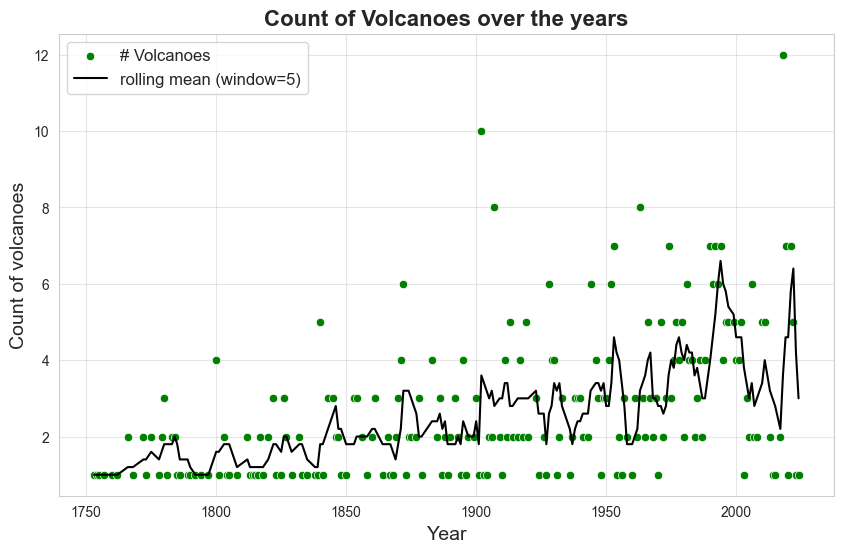

In [508]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df_volcano['year'], y = df_volcano['year_events_amount'], label = '# Volcanoes',
                color = 'green',)

# plt.plot(df_volcano['year'], df_volcano['year_events_amount'], 
#          marker='o', markersize = 4, color = 'black',
#          markerfacecolor='green', markeredgewidth=0.25, label='volcano')

plt.plot(df_volcano['year'], df_volcano['rolling_year_events_amount'], label = 'rolling mean (window=5)',
         color = 'black')
plt.title(f'Count of Volcanoes over the years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of volcanoes', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.5)

plt.savefig(f'../eda_results/volcano_count_trend.png')

### Build the data for forecasting

In [3]:
from build_data import load_data
df = load_data(start_year=1850, end_year=2020)

Time Taken: 0.2929106615483761


In [4]:
df.head(100)

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
0,1850,1,7.371,5_Athens,Greece,37.78,24.41,11.474,12.214,NaN,NaN,2.0,1.0
1,1850,2,9.193,5_Athens,Greece,37.78,24.41,12.227,12.993,NaN,NaN,2.0,1.0
2,1850,3,9.433,5_Athens,Greece,37.78,24.41,12.706,13.444,NaN,NaN,2.0,1.0
3,1850,4,13.630,5_Athens,Greece,37.78,24.41,13.396,14.119,NaN,NaN,2.0,1.0
4,1850,5,17.353,5_Athens,Greece,37.78,24.41,14.324,14.887,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1857,12,9.647,5_Athens,Greece,37.78,24.41,12.256,12.865,NaN,NaN,NaN,NaN
96,1858,1,6.173,5_Athens,Greece,37.78,24.41,11.992,12.688,NaN,NaN,2.0,1.0
97,1858,2,6.221,5_Athens,Greece,37.78,24.41,11.922,12.718,NaN,NaN,2.0,1.0
98,1858,3,11.746,5_Athens,Greece,37.78,24.41,12.731,13.464,NaN,NaN,2.0,1.0


In [5]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, Dataset

In [92]:
# Extract the data
import pandas as pd

temperatures = df['Actual Temperature_Air_Global'].iloc[0:2052].values
print(temperatures)
print(temperatures.shape)

# Normalize the data (Min-Max Normalization)
max_temp = temperatures.max()
min_temp = temperatures.min()
normalized_temp = (temperatures - min_temp) / (max_temp - min_temp)
print(normalized_temp)  # Data will now be in the range [0, 1]


[11.474 12.227 12.706 ... 15.183 14.323 13.36 ]
(2052,)
[0.04847742 0.18025901 0.2640882  ... 0.69758488 0.54707735 0.37854393]


In [14]:
#RNN cell
class RNNCell(torch.nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int):
        """
        Constructor of RNNCell.

        Inputs:
        - input_dim: Dimension of the input x_t
        - hidden_dim: Dimension of the hidden state h_{t-1} and h_t
        """
        super(RNNCell, self).__init__()
        self.linear_x, self.linear_h, self.non_linear = None, None, None
        self.linear_x=torch.nn.Linear(input_dim,hidden_dim)
        self.linear_h=torch.nn.Linear(hidden_dim,hidden_dim)
        self.non_linear=torch.nn.Tanh()


    def forward(self, x_cur: torch.Tensor, h_prev: torch.Tensor):
        """
        Compute h_t given x_t and h_{t-1}.

        Inputs:
        - x_cur: x_t, a tensor with the same of BxC, where B is the batch size and
          C is the channel dimension.
        - h_prev: h_{t-1}, a tensor with the same of BxH, where H is the channel
          dimension.
        """
        h_cur = None
        x_t=self.linear_x(x_cur)
        h_t=self.linear_h(h_prev)
        h_cur=self.non_linear(x_t+h_t)
        return h_cur

In [111]:
#Single Layer RNN
class RNN(torch.nn.Module):
    """
    RNN is a single-layer (stack) RNN by connecting multiple RNNCell together in a single
    direction, where the input sequence is processed from left to right.
    """
    def __init__(self, input_dim: int, hidden_dim: int):
        """
        Constructor of the RNN module.

        Inputs:
        - input_dim: Dimension of the input x_t
        - hidden_dim: Dimension of the hidden state h_{t-1} and h_t
        """
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnncell=RNNCell(input_dim,hidden_dim)
  
    def forward(self, x: torch.Tensor):
        """
        Compute the hidden representations for every token in the input sequence.

        Input:
        - x: A tensor with the shape of BxLxC, where B is the batch size, L is the squence
          length, and C is the channel dimmension

        Return:
        - h: A tensor with the shape of BxLxH, where H is the hidden dimension of RNNCell
        """
        b = x.shape[0]
        seq_len = x.shape[1]
        # initialize the hidden dimension
        init_h = x.new_zeros((b, self.hidden_dim))
        h_list= []
        for t in range(seq_len):
            x_t=x[:,t,:]
            init_h=self.rnncell.forward(x_t,init_h)
            h_list.append(init_h.unsqueeze(1))
        h=torch.cat(h_list,dim=1)
        return h


In [113]:
#RNN Model
class RNNmodel(nn.Module):
    """
    A RNN-based predictor
    """
    def __init__(self,
            input_dim: int, rnn_hidden_dim: int, output_dim: int
        ):
        """
        Constructor.

        Inputs:
        - input_dim: input dimension of the sequence
        - rnn_hidden_dim: The hidden dimension of the RNN.
        - output_dim: output dimension
        """
        super(RNNmodel, self).__init__()
        self.rnn, self.fc = None, None
        #self.rnn=RNN(input_dim,rnn_hidden_dim,batch_first=True, dropout=0.2)
        self.rnn = RNN(input_dim, rnn_hidden_dim)
        self.fc=nn.Linear(rnn_hidden_dim,output_dim)

    def init_weights(self):
        initrange = 0.1
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, x):
        """
        Get the prediction result of the input based on the predictor type

        Input:
        - x: Tensor with the shape of BxLxC.

        Return:
        - y: Tensor with the shape of BxO, where O is the output dimension
        """
 
        y = None
        h=self.rnn(x)
        y=self.fc(h[:,-1,:])
        return y
    

In [114]:
from torch.utils.data import TensorDataset, DataLoader, random_split
# Create time series dataset
def create_timeseries(data, look_back, look_forward):
    X, y = [], []
    for i in range(len(data) - look_back - look_forward + 1):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back:i + look_back + look_forward])
    return np.array(X), np.array(y)

look_back = 12  # Use past 12 months
look_forward = 1  # Predict next month
X, y = create_timeseries(normalized_temp, look_back, look_forward)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Create datasets and dataloaders
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [144]:
# Training setup
batch_size=32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
epochs = 20
# Parameters
input_dim = 1  # Single feature (temperature)
output_dim = 1  # Predicting one value (temperature)
rnn_hidden_dim = 100  # Adjustable hidden dimension

# Instantiate the model
model = RNNmodel(input_dim,rnn_hidden_dim, output_dim)



# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model = model.to(device)


# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(-1).to(device)  # Add input dimension and move to device
        y_batch = y_batch.to(device)   # Remove extra dimension
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_func(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        train_loss += loss.item()
        scheduler.step()
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader):.4f}')

# Evaluate on test set
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(-1).to(device)  # Add input dimension and move to device
        y_batch = y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_func(y_pred, y_batch)
        test_loss += loss.item()
print(f'Test Loss: {test_loss / len(test_loader):.4f}')


Epoch 1, Loss: 0.1446
Epoch 2, Loss: 0.1446
Epoch 3, Loss: 0.1446
Epoch 4, Loss: 0.1446
Epoch 5, Loss: 0.1446
Epoch 6, Loss: 0.1446
Epoch 7, Loss: 0.1446
Epoch 8, Loss: 0.1446
Epoch 9, Loss: 0.1446
Epoch 10, Loss: 0.1446
Epoch 11, Loss: 0.1446
Epoch 12, Loss: 0.1446
Epoch 13, Loss: 0.1446
Epoch 14, Loss: 0.1446
Epoch 15, Loss: 0.1446
Epoch 16, Loss: 0.1446
Epoch 17, Loss: 0.1446
Epoch 18, Loss: 0.1446
Epoch 19, Loss: 0.1446
Epoch 20, Loss: 0.1446
Test Loss: 0.1409


(2052,)
[12.91633078 12.94750103 12.94749795 12.94749798 12.94749798 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799 12.94749799
 12.94749799 12.94749799]
(50,)


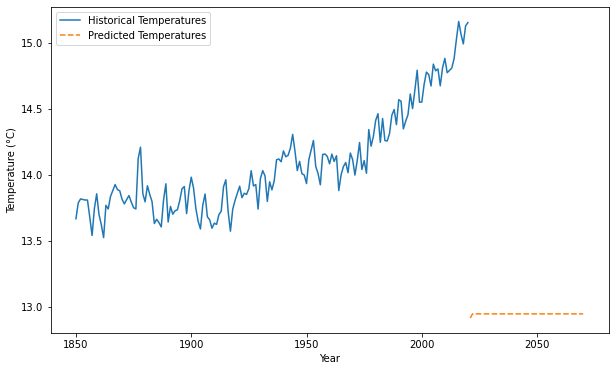

In [145]:
# Step 5: Predict Future Temperatures
model.eval()
predicted_temps = []

# Use the last known sequence
last_sequence = train_data[-1].unsqueeze(0).unsqueeze(-1).to(device)  # Shape: [1, L, C]

for _ in range(50 * 12):  # Predict for 30 years (360 months)
    with torch.no_grad():
        next_temp = model(last_sequence)  # Shape: [1, 1]
        predicted_temps.append(next_temp.item())
        
        # Reshape next_temp to match [1, 1, C] (for concatenation with last_sequence)
        next_temp = next_temp.unsqueeze(-1)  # Shape: [1, 1, C]
        
        
        # Update the sequence (remove the oldest timestep, add the new prediction)
        last_sequence = torch.cat((last_sequence[:, 1:, :], next_temp), dim=1)

# Convert predictions back to original scale
#normalized_temp = (temperatures - min_temp) / (max_temp - min_temp)

#normalized_temp = (temperatures - np.min(temperatures)) / (np.max(temperatures) - np.min(temperatures))

predicted_temps = np.array(predicted_temps)* ((max_temp - min_temp)) + min_temp

temperatures_annual = np.mean(temperatures.reshape(-1, 12), axis=1)  # Annual averages
x_annual = range(1850, 1850 + len(temperatures_annual))
print(temperatures.shape)
pred_temp_annual=np.mean(predicted_temps.reshape(-1, 12), axis=1)
print(pred_temp_annual)
print(pred_temp_annual.shape)

# Step 6: Visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_annual, temperatures_annual, label="Historical Temperatures")
plt.plot(range(2021, 2071), pred_temp_annual, label="Predicted Temperatures", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()